In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

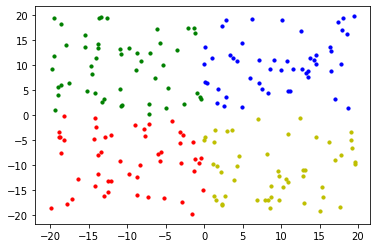

In [2]:
# Prevent divide by 0 errors
np.seterr(divide='ignore', invalid='ignore')
# Generate 4 groups of random 2d data
bgroup = 20 * np.random.rand(200, 2)
rgroup = -20 * np.random.rand(50, 2)
ggroup = 20 * np.random.rand(50, 2) - 50 * [[20, 0]]
ygroup = 20 * np.random.rand(50, 2) - 50 * [[0, 20]]
# Replace the quadrants of bgroup with the other groups
bgroup[50:100, :] = rgroup
bgroup[100:150, :] = ggroup
bgroup[150:200, :] = ygroup
plt.scatter(bgroup[0:50, 0], bgroup[0:50, 1], s = 10, c = 'b')
plt.scatter(bgroup[50:100, 0], bgroup[50:100, 1], s = 10, c = 'r')
plt.scatter(bgroup[100:150, 0], bgroup[100:150, 1], s = 10, c = 'g')
plt.scatter(bgroup[150:200, 0], bgroup[150:200, 1], s = 10, c = 'y')
plt.show()

In [3]:
Kmean = KMeans(n_clusters = 4)
Kmean.fit(bgroup)
Kmean.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 0 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 1 3 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 3 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3
 1 2 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0]


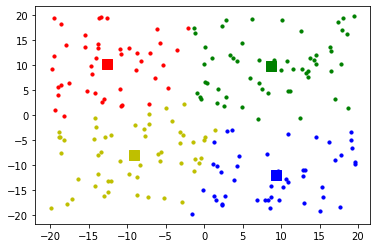

In [4]:
print(Kmean.labels_)
labels = Kmean.labels_
centroids = Kmean.cluster_centers_

for i in range(200):
    if labels[i] == 0:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'b')
    if labels[i] == 1:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'r')
    if labels[i] == 2:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'g')
    if labels[i] == 3:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'y')

plt.scatter(centroids[0][0], centroids[0][1], s = 100, c = 'b', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s = 100, c = 'r', marker='s')
plt.scatter(centroids[2][0], centroids[2][1], s = 100, c = 'g', marker='s')
plt.scatter(centroids[3][0], centroids[3][1], s = 100, c = 'y', marker='s')

plt.show()

In [5]:
# Our KMeans class
class KMemes:
    # Constructor
    def __init__(self, n_clusters, n_init):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.labels_ = []
        self.centroids = []
        self.fitted = False

    # array has 2 axes- (number of points, dimensions per point)
    def fit(self, array):
        # Get number of dimensions for each point
        self.point_dimensions = np.shape(array)[1]
        # resize centroids
        self.centroids = np.random.rand(self.n_clusters, self.point_dimensions)
        # labels has an int representing a centroids index for each point
        self.labels_ = np.zeros(shape=(np.shape(array)[0]), dtype = int)
        # Used to compare different runs against each other
        self.best_distance = sys.maxsize # infinity
        # Number of iterations on best run
        self.best_iterations = 0

        # This loop tries out n_init different fits
        for i in range(self.n_init):
            # Used to measure how many iterations were run
            iterations = 0
            # Randomly select centroids (don't directly change self.centroids yet)
            new_centroids = np.random.rand(self.n_clusters, self.point_dimensions)
            new_labels = np.zeros(shape=(np.shape(array)[0]), dtype = int)
            prev_distance = sys.maxsize

            # This loop improves the fits
            while True:
                iterations += 1
                # Get the closest centroid for each data point
                # We don't want to edit new_centroids just yet
                _new_centroids = new_centroids
                _array = array
                numcentroids = len(_new_centroids)
                numpoints = len(_array)
                # vector dark magic- tiling (repeating) arrays to get pair differences
                _new_centroids = np.repeat([_new_centroids], numpoints, axis = 0)
                _new_centroids = _new_centroids.reshape(_new_centroids.size).reshape((numpoints * numcentroids), self.point_dimensions)
                _array = np.repeat([_array], numcentroids, axis = 1)
                # finding Euclidean distances in vectorizalied way
                square_distances = (_new_centroids - _array)**2
                square_distances = square_distances.sum(axis = 2).reshape(numpoints, numcentroids)
                # new_labels gets the indicies of the closest centroids for each point
                new_labels = np.argmin(square_distances, axis = 1)
                # sum of distances in this iteration (we want to decrease this)
                current_distance = square_distances[np.linspace(0, len(square_distances)-1, len(square_distances),dtype=int), new_labels].sum()

                # Update centroids with means of each cluster:
                # Sum of coordinates of all points in each cluster
                cluster_coordinate_sums = np.zeros((self.n_clusters, self.point_dimensions), dtype=float)
                # Number of points in each cluster
                cluster_numberof_points = np.zeros(self.n_clusters)
                # Check which centroid for every point and get the mean locations of each cluster
                np.add.at(cluster_coordinate_sums, new_labels, array)
                np.add.at(cluster_numberof_points, new_labels, 1)

                cluster_numberof_points = cluster_numberof_points.reshape(np.shape(cluster_numberof_points)[0], 1)
                new_centroids = cluster_coordinate_sums / cluster_numberof_points
                # Stop iterating once the distance has stopped decreasing
                if np.abs(prev_distance - current_distance) < 0.1 or iterations > 300:
                    self.fitted = True
                    if current_distance < self.best_distance:
                        self.best_distance = current_distance
                        self.best_iterations = iterations
                        # Update the actual centroids and labels
                        self.centroids = new_centroids
                        self.labels_ = new_labels
                    break
                prev_distance = current_distance

    def debugprint(self):
        if self.fitted == False:
            print("Not fitted")
            return
        print("centroids: " + str(self.centroids))
        print("labels: " + str(self.labels_))   
        print("iterations: " + str(self.best_iterations))
        print("distance sum: " + str(self.best_distance))


centroids: [[ -8.76964078  -8.27869483]
 [-12.57790866  10.06932232]
 [  8.65586704   9.77366293]
 [  9.8017029  -12.11217647]]
labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0
 1 2 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 0 3 3 3 3 3 3 3
 3 0 3 3 3 3 3 0 3 3 3 3 3 2 3]
iterations: 9
distance sum: 12978.033505742405


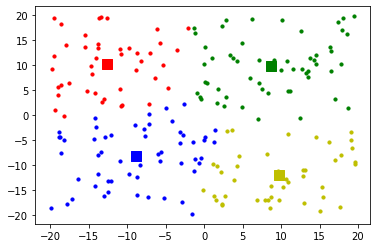

In [6]:
myKmeans = KMemes(n_clusters = 4, n_init = 50)
myKmeans.fit(bgroup)
myKmeans.debugprint()

myLabels = myKmeans.labels_
myCentroids = myKmeans.centroids

for i in range(200):
    if myLabels[i] == 0:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'b')
    if myLabels[i] == 1:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'r')
    if myLabels[i] == 2:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'g')
    if myLabels[i] == 3:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'y')

plt.scatter(myCentroids[0][0], myCentroids[0][1], s = 100, c = 'b', marker='s')
plt.scatter(myCentroids[1][0], myCentroids[1][1], s = 100, c = 'r', marker='s')
plt.scatter(myCentroids[2][0], myCentroids[2][1], s = 100, c = 'g', marker='s')
plt.scatter(myCentroids[3][0], myCentroids[3][1], s = 100, c = 'y', marker='s')

plt.show()

In [7]:
# Import the spotify data
data_raw = pd.read_csv('data_by_artist_o.csv')

In [8]:
# Useful function from StackOverflow
# Prevent the distances from being too large and breaking the model
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [9]:
# Drop useless columns
data = data_raw.drop(columns = ['genres', 'artists', 'duration_ms', 'count', 'key'])
# Prevent distances from getting larger than sys.maxsize
data['loudness'] = NormalizeData(data['loudness'])
data['tempo'] = NormalizeData(data['tempo'])
data['popularity'] = NormalizeData(data['popularity'])
data = data.dropna()

In [10]:
# Fit scikit model to data
scikitFit = KMeans()
scikitFit.fit(data)
scikitFit.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [11]:
# Fit our model to data
ourFit = KMemes(n_clusters = 8, n_init = 30)
ourFit.fit(data)

In [12]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print(scikitFit.cluster_centers_)
print()
print(ourFit.centroids)

[[0.132421 0.620989 0.712155 0.025217 0.196979 0.860000 0.099019 0.565343
  0.587325 0.509044 1.000000]
 [0.906443 0.460166 0.262045 0.083000 0.236315 0.740968 0.109889 0.497430
  0.449130 0.110215 1.000000]
 [0.847214 0.397493 0.252728 0.781582 0.178783 0.675728 0.060519 0.486905
  0.354602 0.284592 -0.000000]
 [0.151817 0.652044 0.702023 0.095522 0.193627 0.858675 0.114969 0.555490
  0.564210 0.507685 -0.000000]
 [0.815185 0.509178 0.345516 0.066521 0.214209 0.764915 0.101726 0.510956
  0.499863 0.238440 -0.000000]
 [0.151692 0.530223 0.689966 0.692401 0.209999 0.812569 0.062916 0.556986
  0.440592 0.354828 1.000000]
 [0.915026 0.379316 0.213251 0.766474 0.172909 0.674208 0.060348 0.481357
  0.341627 0.239488 1.000000]
 [0.581475 0.577987 0.465710 0.031604 0.197446 0.807246 0.080882 0.537837
  0.574307 0.440014 1.000000]]

[[0.132860 0.620951 0.711908 0.025071 0.196874 0.859999 0.099012 0.565255
  0.587379 0.509275 1.000000]
 [0.151278 0.652088 0.702345 0.095642 0.193645 0.858737 0.1

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

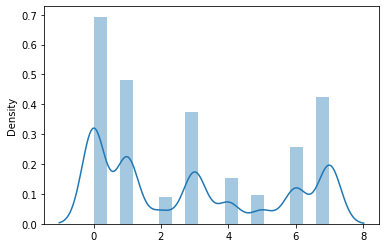

In [14]:
sns.distplot(scikitFit.labels_)

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

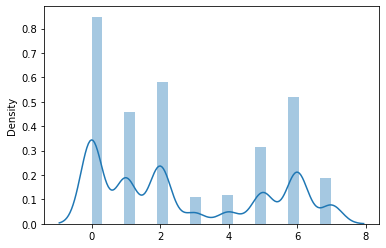

In [15]:
sns.distplot(ourFit.labels_)